<a href="https://colab.research.google.com/github/m-volnykh/Programming6/blob/main/LR05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №5: Предсказание дефолта

Выполнила Вольных М. В., 3 курс ИВТ, 2-1

## 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
%%capture
!wget https://www.dropbox.com/s/io67uppgq66plbp/training_data.csv
!wget https://www.dropbox.com/s/2ga9maqxbsf8xhg/test_data.csv

In [3]:
training_data = pd.read_csv('training_data.csv')
training_data.sample(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
20533,0,0.896887,31,0,0.416164,4478.0,7,0,1,0,2.0
33551,0,0.038803,77,0,0.127183,7500.0,9,0,1,0,0.0
40909,0,0.482179,56,0,0.756897,2500.0,7,0,1,0,0.0
30533,0,0.037687,52,1,0.187230,4400.0,21,0,1,0,0.0
9997,0,0.381511,35,0,0.439567,3325.0,13,0,1,0,1.0
1706,0,0.003896,51,0,0.222753,9000.0,13,0,2,0,2.0
6256,0,0.435599,64,0,0.234642,4150.0,13,0,0,0,0.0
15557,0,0.072867,58,0,0.409625,7833.0,4,0,1,0,2.0
33830,0,0.135652,50,0,0.147420,14746.0,19,0,1,0,2.0
26345,0,0.638205,38,0,0.263687,2885.0,6,0,0,0,0.0


In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      50000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  50000 non-null  float64
 2   age                                   50000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  50000 non-null  int64  
 4   DebtRatio                             50000 non-null  float64
 5   MonthlyIncome                         40147 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       50000 non-null  int64  
 7   NumberOfTimes90DaysLate               50000 non-null  int64  
 8   NumberRealEstateLoansOrLines          50000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  50000 non-null  int64  
 10  NumberOfDependents                    48667 non-null  float64
dtypes: float64(4), 

Есть пропуски в данных: MonthlyIncome, NumberOfDependents.

In [5]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,50000.0,0.066860,0.249782,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,50000.0,7.927880,332.393142,0.0,0.030096,0.154426,0.555651,50708.0
age,50000.0,52.240520,14.766593,21.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,50000.0,0.428220,4.269296,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,50000.0,352.441921,2006.426016,0.0,0.176304,0.366811,0.862599,329664.0
MonthlyIncome,40147.0,6642.232222,18122.708690,0.0,3400.000000,5400.000000,8250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,50000.0,8.476040,5.172756,0.0,5.000000,8.000000,11.000000,57.0
NumberOfTimes90DaysLate,50000.0,0.269920,4.243110,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,50000.0,1.017500,1.120151,0.0,0.000000,1.000000,2.000000,32.0
NumberOfTime60-89DaysPastDueNotWorse,50000.0,0.246040,4.231055,0.0,0.000000,0.000000,0.000000,98.0


## 2. Загрузка данных перед обучением

In [6]:
# 1. TODO
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      50000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  50000 non-null  float64
 2   age                                   50000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  50000 non-null  int64  
 4   DebtRatio                             50000 non-null  float64
 5   MonthlyIncome                         40147 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       50000 non-null  int64  
 7   NumberOfTimes90DaysLate               50000 non-null  int64  
 8   NumberRealEstateLoansOrLines          50000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  50000 non-null  int64  
 10  NumberOfDependents                    48667 non-null  float64
dtypes: float64(4), 

**Заполнение пропусков в данных**

In [7]:
# 2. TODO
train_mean = training_data.mean()

# 3. TODO
training_data.fillna(train_mean, inplace=True)

**Работа с целевой переменной**

In [8]:
target_variable_name = 'SeriousDlqin2yrs'

training_data[target_variable_name].value_counts()

,count
SeriousDlqin2yrs,
0,46657
1,3343


In [9]:
# 4. TODO
training_values = training_data[target_variable_name]
training_values.shape

(50000,)

In [10]:
# 5. TODO
training_points = training_data.drop(target_variable_name, axis=1)
training_points.shape

(50000, 10)

## 3. Обучение модели

**Модель Логистической Регрессии:**

In [11]:
from sklearn import linear_model, ensemble

# 6. TODO
logreg_model = linear_model.LogisticRegression()

# 8. TODO
logreg_model.fit(training_points, training_values)

LogisticRegression()

**Модель Random Forest Classifier:**

In [12]:
# 7. TODO
rf_model = ensemble.RandomForestClassifier()

# 9. TODO
rf_model.fit(training_points, training_values)

RandomForestClassifier()

## 4. Загрузка и предобработка тестовых данных

**Загрузка:**

In [13]:
test_data = pd.read_csv('test_data.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      37500 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  37500 non-null  float64
 2   age                                   37500 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  37500 non-null  int64  
 4   DebtRatio                             37500 non-null  float64
 5   MonthlyIncome                         30044 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       37500 non-null  int64  
 7   NumberOfTimes90DaysLate               37500 non-null  int64  
 8   NumberRealEstateLoansOrLines          37500 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  37500 non-null  int64  
 10  NumberOfDependents                    36521 non-null  float64
dtypes: float64(4), 

In [14]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,37500.0,0.067387,0.250694,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,37500.0,6.031470,201.538421,0.0,0.029634,0.155112,0.565469,18300.0
age,37500.0,52.367387,14.769995,0.0,41.000000,52.000000,63.000000,107.0
NumberOfTime30-59DaysPastDueNotWorse,37500.0,0.448613,4.478678,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,37500.0,341.402289,1131.165077,0.0,0.173310,0.365951,0.866864,60212.0
MonthlyIncome,30044.0,6571.071295,7639.608316,0.0,3383.000000,5374.500000,8200.000000,562466.0
NumberOfOpenCreditLinesAndLoans,37500.0,8.428587,5.143302,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,37500.0,0.292667,4.458953,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,37500.0,1.020160,1.152043,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,37500.0,0.266160,4.444065,0.0,0.000000,0.000000,0.000000,98.0


Пропуски данных присутствуют в тех же строках, что и в тренировочных данных.

**Заполнение пропусков:**

In [15]:
# 10. TODO
test_data = test_data.fillna(train_mean)

**Работа с целевой переменной:**

In [16]:
# 11. TODO
test_values = test_data[target_variable_name]
test_values.shape

(37500,)

In [17]:
# 12. TODO
test_points = test_data.drop(target_variable_name, axis=1)
test_points.shape

(37500, 10)

## 5. Валидация модели на тестовой выборке

Предсказания *Логистической Регрессии* :

In [18]:
# 13. TODO
test_pred_logreg = logreg_model.predict(test_points)

# 15. TODO
pd.Series(test_pred_logreg).value_counts()

,count
0,37436
1,64


Предсказания *Random Forest Classifier* :

In [19]:
# 14. TODO
test_pred_rf = rf_model.predict(test_points)

# 16. TODO
pd.Series(test_pred_rf).value_counts()

,count
0,36630
1,870


### 5.1 Точность прогноза

Точность моделей:

In [20]:
import sklearn.metrics as metrics

accuracy = pd.Series(index=['RF Classifier', 'Logistic Regression'], name='accuracy')

# 17. TODO
accuracy['Logistic Regression'] = metrics.accuracy_score(test_values, test_pred_logreg)
accuracy['RF Classifier'] = metrics.accuracy_score(test_values, test_pred_rf)

accuracy

,accuracy
RF Classifier,0.935120
Logistic Regression,0.932453


Точность константного классификатора:

In [21]:
# 18. TODO
metrics.accuracy_score(test_values, np.zeros_like(test_values))

0.9326133333333333

Точности моделей отличаются незначительно, однако Логистическая Регрессия ближе к точности константного классификатора.

### 5.2 Таблица сопряженности модели классификации

In [22]:
# 19. TODO
cm_logreg = pd.DataFrame(metrics.confusion_matrix(test_values, test_pred_logreg))

cm_logreg

,0,1
0,34938,35
1,2498,29


In [23]:
# 19. TODO
cm_rf = pd.DataFrame(metrics.confusion_matrix(test_values, test_pred_rf))

cm_rf

,0,1
0,34585,388
1,2045,482


### 5.3 Прогноз вероятности принадлежности к классу

In [24]:
test_proba_logreg = logreg_model.predict_proba(test_points)
test_proba_logreg[:5,:]

array([[0.82112701, 0.17887299],
       [0.8365228 , 0.1634772 ],
       [0.9472444 , 0.0527556 ],
       [0.88775646, 0.11224354],
       [0.92404023, 0.07595977]])

Вероятности принадлежности к первому и второму классу в соответствующих столбцах.

In [25]:
test_proba_logreg[:,1]

array([0.17887299, 0.1634772 , 0.0527556 , ..., 0.03047235, 0.03126387,
       0.06908338])

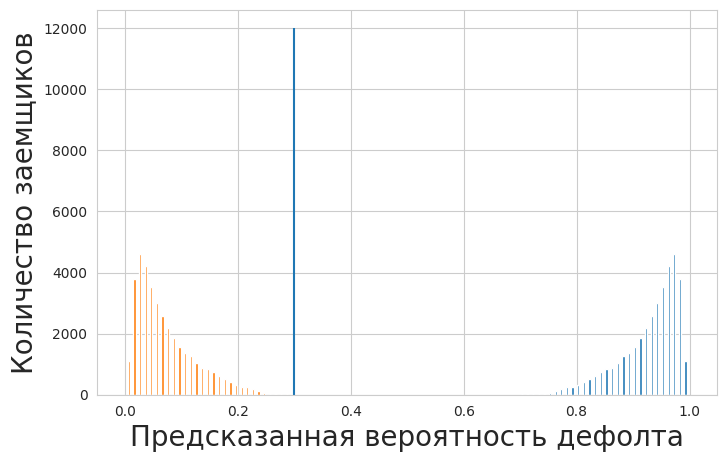

In [26]:
plt.figure(figsize=(8, 5))

plt.hist(test_proba_logreg, bins=100)
plt.vlines(0.3, 0, 12000)

plt.xlabel('Предсказанная вероятность дефолта', fontsize=20)
plt.ylabel('Количество заемщиков', fontsize=20);

### 5.4. Выбор порога классификатора

**Для логистической регрессии:**

In [27]:
alt_test_predict = (test_proba_logreg[:,1] > 0.3).astype(int)

alt_cm = pd.DataFrame(metrics.confusion_matrix(test_values, alt_test_predict))
alt_cm

,0,1
0,34925,48
1,2483,44


In [28]:
# 21. TODO
alt_test_predict = (test_proba_logreg[:,1] > 0.3).astype(int)

alt_cm = pd.DataFrame(metrics.confusion_matrix(test_values, alt_test_predict))
alt_cm

,0,1
0,34925,48
1,2483,44


**Для Random Forest Classifier:**

In [29]:
# 22. TODO
test_proba_rf = rf_model.predict_proba(test_points)

alt_test_predict = (test_proba_rf[:,1] > 0.3).astype(int)

alt_cm = pd.DataFrame(metrics.confusion_matrix(test_values, alt_test_predict))
alt_cm

,0,1
0,33586,1387
1,1520,1007


In [30]:
alt_test_predict = (test_proba_rf[:,1] > 0.5).astype(int)

alt_cm = pd.DataFrame(metrics.confusion_matrix(test_values, alt_test_predict))
alt_cm

,0,1
0,34585,388
1,2045,482


In [31]:
alt_test_predict = (test_proba_rf[:,1] > 0.7).astype(int)

alt_cm = pd.DataFrame(metrics.confusion_matrix(test_values, alt_test_predict))
alt_cm

,0,1
0,34914,59
1,2410,117


## Бонус: ROC кривая классификатора

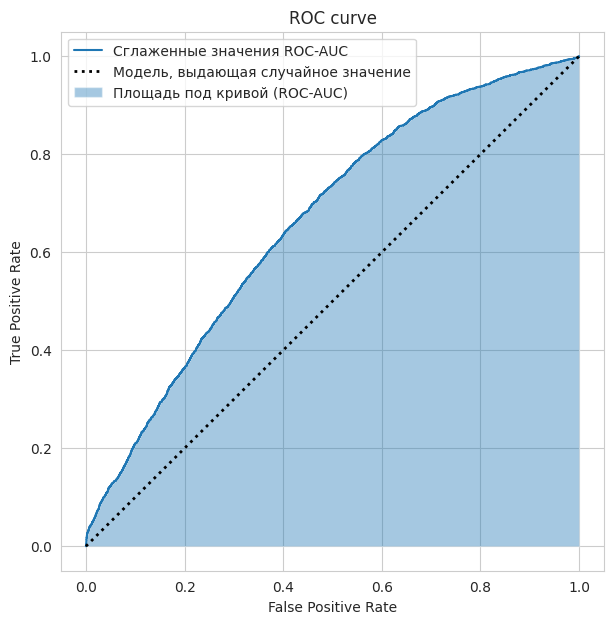

In [32]:
# 23. TODO

false_positive_rates, true_positive_rates, threshold = metrics.roc_curve(test_values, test_proba_logreg[:,1])

# создаём график
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

In [33]:
# 24. TODO

roc_auc_value = metrics.roc_auc_score(test_values, test_proba_logreg[:,1])

print("для Логистической Регрессии\nROC-AUC на тестовой выборке: {:.3f}".format(roc_auc_value))

для Логистической Регрессии
ROC-AUC на тестовой выборке: 0.662


In [34]:
# 24. TODO

roc_auc_value = metrics.roc_auc_score(test_values, test_proba_rf[:,1])

print("для Random Forest Classifier\nROC-AUC на тестовой выборке: {:.3f}".format(roc_auc_value))

для Random Forest Classifier
ROC-AUC на тестовой выборке: 0.841


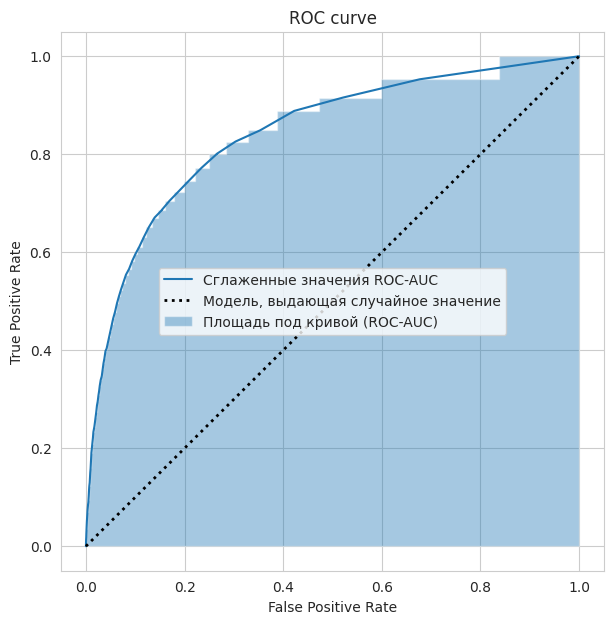

In [35]:
# 26. TODO

false_positive_rates, true_positive_rates, threshold = metrics.roc_curve(test_values, test_proba_rf[:,1])

# создаём график
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()